In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train'
valid_path = '/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/test'


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
# useful for getting number of classes
folders = glob('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train/*')
print(len(folders))

2


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
import tensorflow as tf
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/CBIS-DDSM final train_test mammogram data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 370 images belonging to 2 classes.
Found 357 images belonging to 2 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
 2/12 [====>.........................] - ETA: 4:08 - loss: 1.3400 - accuracy: 0.5200

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/12 [=========>....................] - ETA: 3:43 - loss: 1.1984 - accuracy: 0.5000

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/12 [===========>..................] - ETA: 3:25 - loss: 1.1707 - accuracy: 0.5068

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/12 [=====================>........] - ETA: 1:29 - loss: 0.9469 - accuracy: 0.5474

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/12 [==========================>...] - ETA: 30s - loss: 0.8910 - accuracy: 0.5592 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/12 [==============================] - 373s 31s/step - loss: 0.8646 - accuracy: 0.5757 - val_loss: 0.3809 - val_accuracy: 0.7199
Epoch 2/5
12/12 [==============================] - 63s 5s/step - loss: 0.5904 - accuracy: 0.6676 - val_loss: 0.4961 - val_accuracy: 0.6443
Epoch 3/5
12/12 [==============================] - 65s 5s/step - loss: 0.5208 - accuracy: 0.7216 - val_loss: 0.3214 - val_accuracy: 0.7031
Epoch 4/5
12/12 [==============================] - 65s 5s/step - loss: 0.4722 - accuracy: 0.7676 - val_loss: 0.4102 - val_accuracy: 0.6583
Epoch 5/5
12/12 [==============================] - 65s 5s/step - loss: 0.5034 - accuracy: 0.7270 - val_loss: 0.5534 - val_accuracy: 0.7059


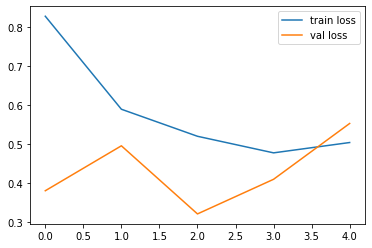

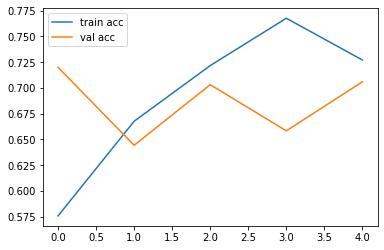

<Figure size 432x288 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
predictions = model.predict(test_set).argmax( axis=-1 ) 


In [ ]:
print(len(predictions))
predictions.resize(357,refcheck=False)
print(len(predictions))

357
357


In [ ]:
print ( predictions )

[0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]


In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
#print(test_set)
print('F1_score : ',f1_score(test_set.classes,predictions,average='micro'))
print('sensitibity : ',metrics.recall_score(test_set.classes,predictions,average='micro'))

F1_score :  0.45938375350140054
sensitibity :  0.45938375350140054


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.47      0.57      0.52       180
           1       0.44      0.34      0.39       177

    accuracy                           0.46       357
   macro avg       0.46      0.46      0.45       357
weighted avg       0.46      0.46      0.45       357



In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

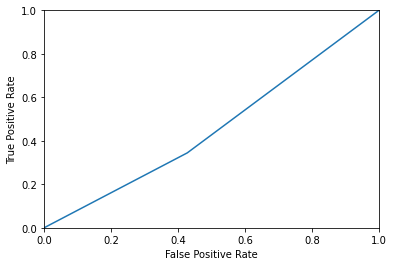

0.4584274952919021
-0.08536846489158217


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_set.classes,predictions)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_set.classes,predictions) 
print(auc_score) 
print(matthews_corrcoef(test_set.classes,predictions))